In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [2]:
life_data = pd.read_csv('../curves-modules/datasets/life.csv').dropna()

In [22]:
def check(regressor, gender='female'):
    life_male_data = life_data[life_data['Gender']==gender]
    life_male_age = life_male_data["Age"]
    life_male_data = life_male_data.drop(['Unnamed: 0', 'Body Type', 'Record Number', 'Age', 'Gender', 'BMI',
        'WHR', 'WHtR', 'ABSI', 'Age'], axis=1)
    X = life_male_data
    y = life_male_age

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    clt = regressor(random_state=42, n_estimators=100)
    clt.fit(x_train, y_train)
    y_generated = np.rint(clt.predict(x_test))
    mean_absolute_percentage_error(y_generated, y_test)

    possibilities = sorted(zip(clt.feature_importances_, life_male_data.columns), reverse=True)
    possibilities_len = len(possibilities)

    error = []
    for size in range(possibilities_len):
        semantic = np.array(possibilities[0:size+1])[:,1]
        x_train, x_test, y_train, y_test = train_test_split(X[semantic], y, test_size=0.33, random_state=42)
        clt = regressor(random_state=42, n_estimators=100)
        clt.fit(x_train, y_train)
        y_generated = np.rint(clt.predict(x_test))
        error.append(mean_absolute_percentage_error(y_generated, y_test))
    error = np.array(error)

    plt.figure(figsize=(10,7))
    plt.plot(error)
    plt.ylabel("%error")
    plt.xlabel("number of measurements")
    plt.show()

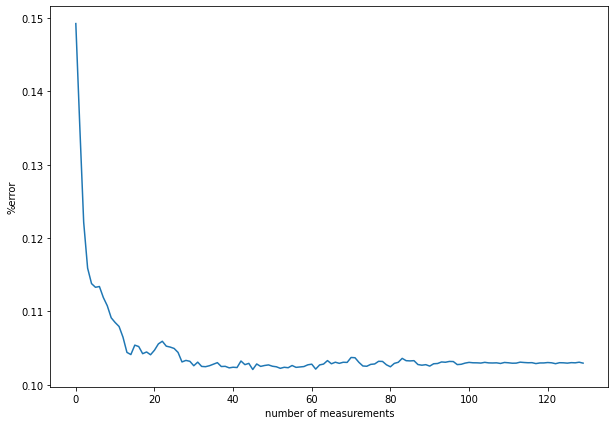

In [15]:
check(GradientBoostingRegressor, 'male')

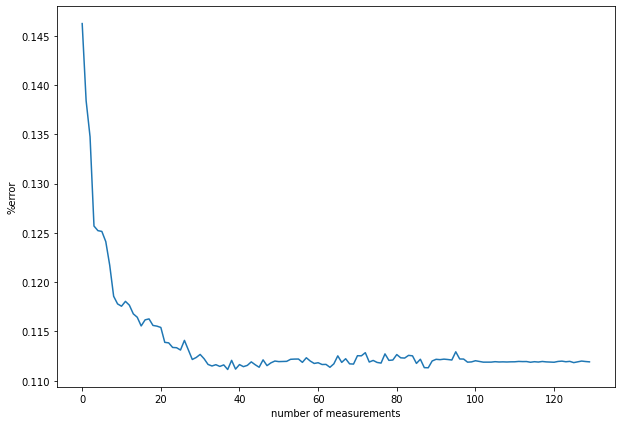

In [16]:
check(GradientBoostingRegressor, 'female')

In [23]:
check(GradientBoostingClassifier, 'male')

KeyboardInterrupt: 

In [ ]:
check(GradientBoostingClassifier, 'female')

In [11]:
np.array(possibilities[0:15])[:,1]

array(['WAIST_T_BUTTOCK', 'WRIST_GTH', 'THIGH_GTH_R_HZ', 'BELLY_DEPTH',
       'HEAD_HT', 'TORSO_WTH_WAIST', 'WAIST_BUTTOCK_HT_R',
       'THIGH_GTH_L_HZ', 'UP_ARM_DIAM_R', 'NECK_DEPTH', 'UP_ARM_DIAM_L',
       'BUST_PT_T_NECK_R', 'HIGH_WAIST_GTH', 'FOREARM_GTH_R',
       'FOREARM_GTH_L'], dtype='<U32')